#1.Planteamiento de la problemática
Hemos sido contratados en el equipo de ciencia de datos en una consultora de renombre. Nos han asignado a un proyecto de estudio de atención en salud para un
importante hospital. Nuestro cliente desea saber las características más importantes que tienen los pacientes de cierto tipo de enfermedad que terminan en
hospitalización. Fue definido como caso aquel paciente que fue sometido a biopsia prostática y que en un periodo máximo de 30 días posteriores al procedimiento
presentó fiebre, infección urinaria o sepsis; requiriendo manejo médico ambulatorio u hospitalizado para la resolución de la complicación y como control al paciente
que fue sometido a biopsia prostática y que no presentó complicaciones infecciosas en el período de 30 días posteriores al procedimiento. Dado que tienen en su
base de datos algunos datos referentes a los pacientes y resultados de exámenes diagnósticos, de pacientes hospitalizados y no hospitalizados, nos han entregado
esta información.
Para ello, nuestro departamento de datos ha recopilado Antecedentes del paciente , Morbilidad asociada al paciente y Antecedentes relacionados
con la toma de la biopsia y Complicaciones infecciosas .

#2. Preparación de datos

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Cargamos la base de datos

In [ ]:
df = pd.read_csv('/content/BBDD_Hospitalización.csv', sep = ";")

In [ ]:
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [ ]:
df.dtypes 

EDAD                                                                         float64
DIABETES                                                                      object
HOSPITALIZACIÓN ULTIMO MES                                                    object
PSA                                                                          float64
BIOPSIAS PREVIAS                                                              object
VOLUMEN PROSTATICO                                                            object
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       object
NUMERO DE MUESTRAS TOMADAS                                                   float64
CUP                                                                           object
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             object
BIOPSIA                                                                       object
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN IN

In [ ]:
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


¿Cuanto es el porcentaje de valores nulos?


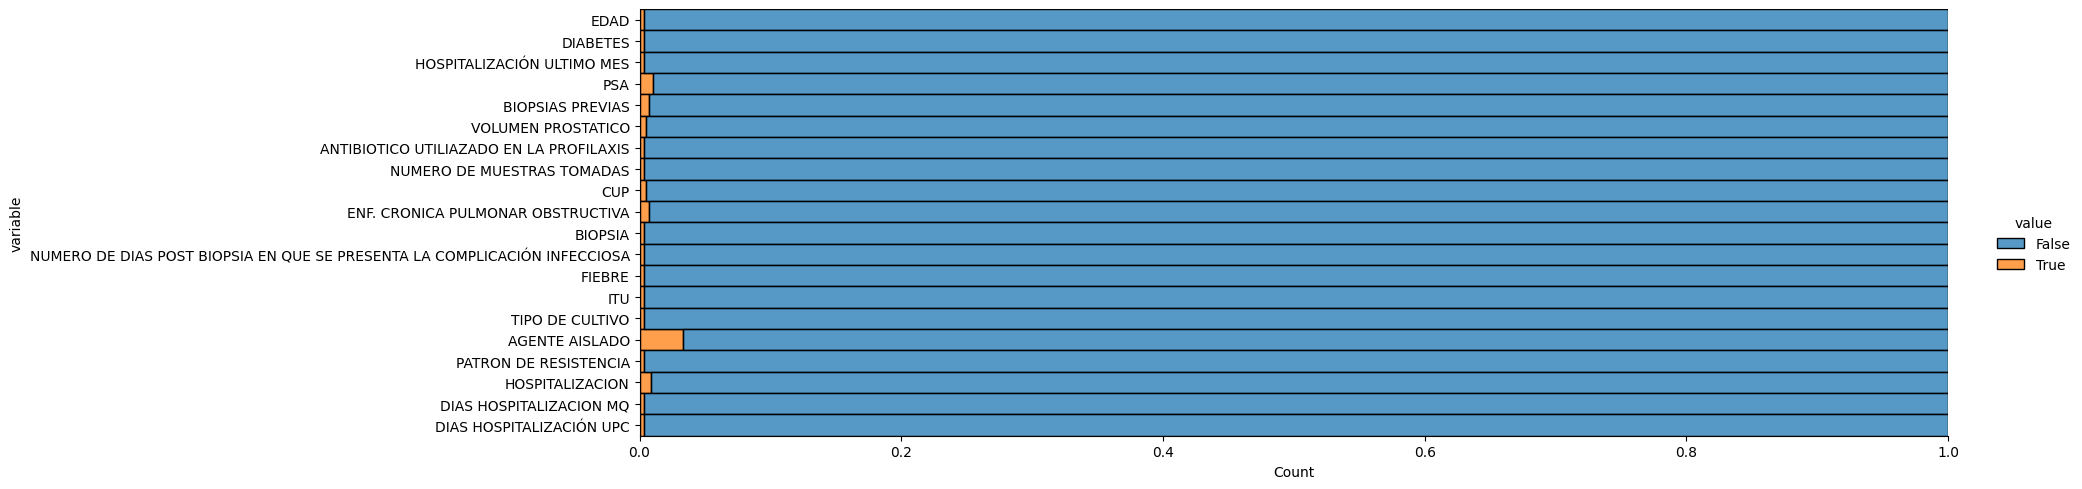

In [ ]:
(df.isnull().melt().pipe(lambda df:(sns.displot(data=df,y='variable',hue='value',multiple='fill',aspect=4))))
plt.show()

Este codigo nos devuelve los indices que tienen valores nulos en cualquier columna

In [ ]:
indices_nulos = df[df.isnull().any(axis=1)].index
indices_nulos

Int64Index([  9,  26,  31,  76,  92,  99, 100, 103, 106, 109, 115, 116, 121,
            126, 128, 129, 130, 138, 139, 146, 151, 156, 167, 170, 565, 566,
            567, 568, 569],
           dtype='int64')

Cantidad de filas que tienen valores nulos

In [ ]:
len(indices_nulos)

29

Miramos cuantos valores nulos tiene cada fila

In [ ]:
df_filtrado = df.iloc[indices_nulos, :]

In [ ]:
valores_nulos_por_fila = df_filtrado.isnull().sum(axis=1)[indices_nulos]
valores_nulos_por_fila

9       1
26      1
31      1
76      1
92      1
99      1
100     1
103     1
106     1
109     1
115     1
116     1
121     1
126     1
128     1
129     1
130     1
138     1
139     1
146     1
151     1
156     1
167     1
170     1
565     3
566     2
567     1
568    20
569    20
dtype: int64

Con esto, decidimos que las filas 568 y 569 pueden ser eliminadas ya que no tienen ningún valor

In [ ]:
df2 = df.drop(index= [568, 569])

Revisamos los nulos en la columna Hospitalizacion ya que es nuestra variable objetivo. Y luego eliminamos las filas que tienen nulos 


In [ ]:
df2['HOSPITALIZACION'].isnull().sum()

3

In [ ]:
df2=df2.dropna(subset='HOSPITALIZACION')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       565 non-null    float64
 1   DIABETES                                                                   565 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 565 non-null    object 
 3   PSA                                                                        561 non-null    float64
 4   BIOPSIAS PREVIAS                                                           563 non-null    object 
 5   VOLUMEN PROSTATICO                                                         564 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

Modificamos los tipos de datos de las columnas que consideramos que no podían ser floats. Por ejemplo la edad, el número de muestras y los días.

In [ ]:
df2['EDAD'] = df2['EDAD'].astype(int)
df2['NUMERO DE MUESTRAS TOMADAS'] = df2['NUMERO DE MUESTRAS TOMADAS'].astype(int)
df2['DIAS HOSPITALIZACION MQ'] = df2['DIAS HOSPITALIZACION MQ'].astype(int)
df2['DIAS HOSPITALIZACIÓN UPC'] = df2['DIAS HOSPITALIZACIÓN UPC'].astype(int)

Modificamos los nombres de dos columnas poco prácticas para su uso.

In [ ]:
df2.rename(columns={'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'NRO DIAS POST BIOPSIA COMPLICACION INFECCIOSA'}, inplace=True)
df2.rename(columns={'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'ANTIBIOTICO'}, inplace=True)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   EDAD                                           565 non-null    int64  
 1   DIABETES                                       565 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                     565 non-null    object 
 3   PSA                                            561 non-null    float64
 4   BIOPSIAS PREVIAS                               563 non-null    object 
 5   VOLUMEN PROSTATICO                             564 non-null    object 
 6   ANTIBIOTICO                                    565 non-null    object 
 7   NUMERO DE MUESTRAS TOMADAS                     565 non-null    int64  
 8   CUP                                            564 non-null    object 
 9   ENF. CRONICA PULMONAR OBSTRUCTIVA              563 non

In [ ]:
df2.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,565.000000,561.000000,565.000000,565.000000,565.000000
mean,63.870796,13.300303,13.001770,0.166372,0.014159
std,9.295538,15.705098,3.930919,0.960534,0.196993
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


Hacemos un boxplot e histogramas de las variables para descubrir valores atipicos y etender si son errores al cargar la base de datos

<Axes: >

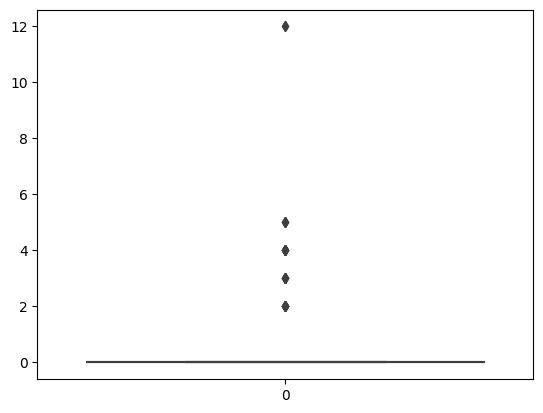

In [ ]:
sns.boxplot(data=df2['DIAS HOSPITALIZACION MQ'])

Text(0, 0.5, 'Frecuencia')

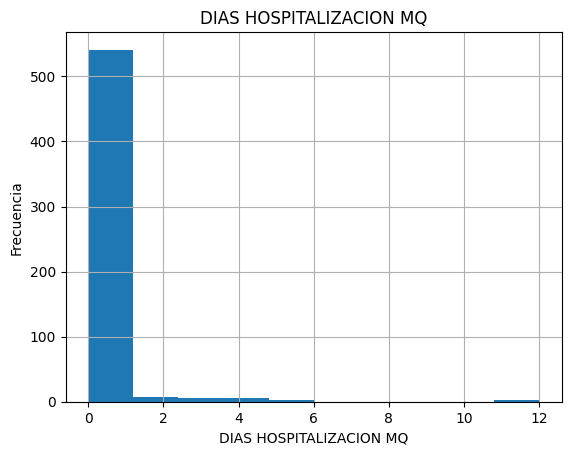

In [ ]:
df2["DIAS HOSPITALIZACION MQ"].hist()  

plt.title('DIAS HOSPITALIZACION MQ')
plt.xlabel('DIAS HOSPITALIZACION MQ')
plt.ylabel('Frecuencia')

En este gráfico podemos observar que la mayoría de los registros son "0", por lo tanto la mayoría de los pacientes no fueron hospitalizados para tratamiento médico quirúrgico. Los valores atípicos en este caso no representan valores equivocados. 

<Axes: >

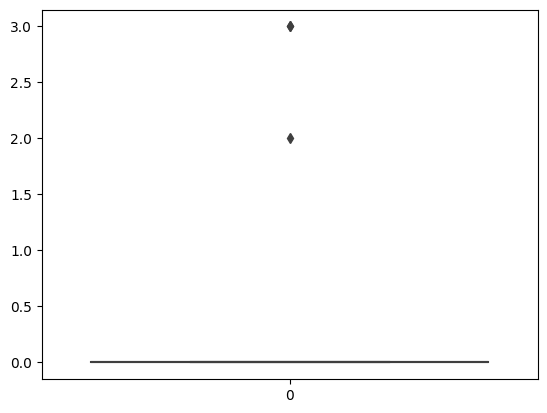

In [ ]:
sns.boxplot(data=df2['DIAS HOSPITALIZACIÓN UPC'])

Text(0, 0.5, 'Frecuencia')

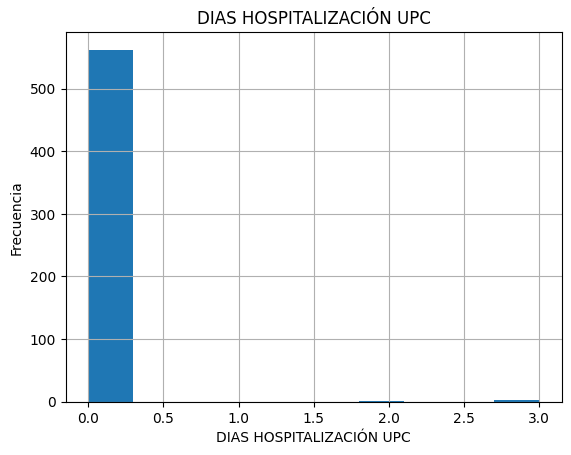

In [ ]:
df2["DIAS HOSPITALIZACIÓN UPC"].hist()  

plt.title('DIAS HOSPITALIZACIÓN UPC')
plt.xlabel('DIAS HOSPITALIZACIÓN UPC')
plt.ylabel('Frecuencia')

En este gráfico podemos observar que la mayoría de los registros son "0", por lo tanto la mayoría de los pacientes no fueron hospitalizados para tratamiento de estado crítico. Los valores atípicos en este caso no representan valores equivocados. 

<Axes: >

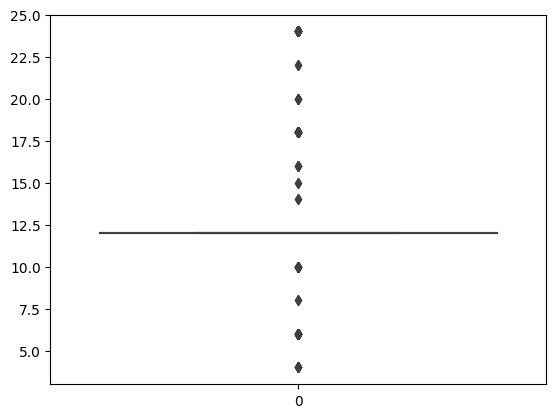

In [ ]:
sns.boxplot(data=df2['NUMERO DE MUESTRAS TOMADAS'])

Text(0, 0.5, 'Frecuencia')

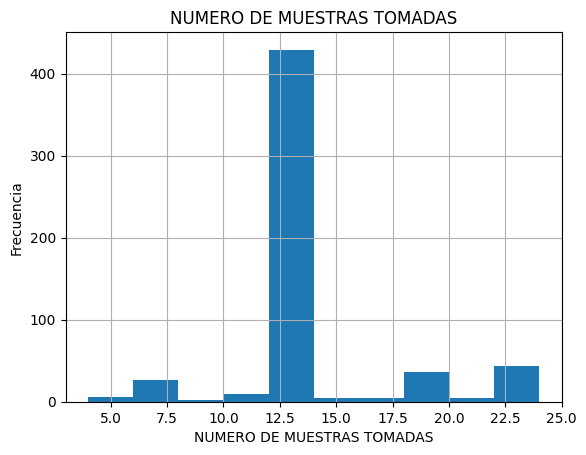

In [ ]:
df2["NUMERO DE MUESTRAS TOMADAS"].hist()  

plt.title('NUMERO DE MUESTRAS TOMADAS')
plt.xlabel('NUMERO DE MUESTRAS TOMADAS')
plt.ylabel('Frecuencia')

En este gráfico podemos observar valores atípicos, pero son pertinentes a la cantidad de muestras tomadas.

Text(0, 0.5, 'Frecuencia')

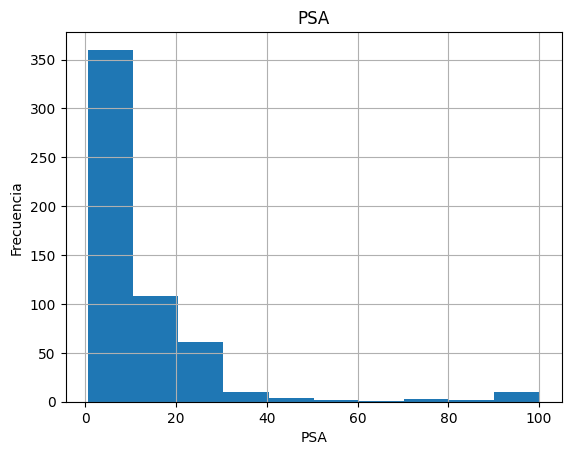

In [ ]:
df2["PSA"].hist()

plt.title('PSA')
plt.xlabel('PSA')
plt.ylabel('Frecuencia')


En este gráfico aparentemente observamos un gran número de valores atípicos, pero investigamos la concentración del PSA en la sangre y los valores altos pueden corresponder a pacientes con cáncer de próstata o con metástasis. 
Fuente: https://urologiapepauguet.com/blog/psa-valor-normal-causas-elevacion-tipos/#:~:text=El%20%C3%BAnico%20caso%20en%20el,o%202000%20ng%2Fml).

<Axes: >

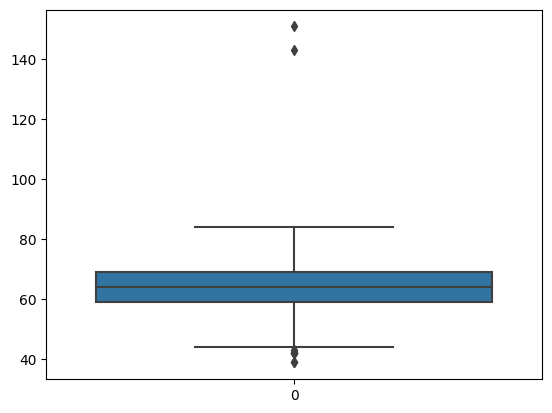

In [ ]:
sns.boxplot(data=df2['EDAD'])

En este gráfico podemos observar 2 valores atípicos por encima de 140. Entendemos que es un error humano y que debemos tomar una decisión sobre qué hacer. 

Hablamos con el cliente, le entregamos el informe de los outliers y decidimos normalizar los dos valores con el promedio de la columna "EDAD". Buscamos los dos registros y los modificamos. 

In [ ]:
df2 [df2["EDAD"] >100]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NRO DIAS POST BIOPSIA COMPLICACION INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
161,143,SI,NO,6.8,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0
181,151,NO,NO,5.7,NO,SI,OTROS,12,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0


Con este código creamos una máscara en la cual sacamos los valores mayores a 100, luego creamos la media y reemplazamos los valores con el valor de la media(64). 

In [ ]:
round(df2[df2["EDAD"] < 100]["EDAD"].mean())

64

In [ ]:
df2.loc[[161, 181], "EDAD"] = round(df2[df2["EDAD"] < 100]["EDAD"].mean())

Revisar valores faltantes o nulos 
31/05

In [ ]:
num_vars = df2.select_dtypes(include=['float', 'int']).columns
null_counts = df2[num_vars].isnull().sum()
# Imprime los resultados
print("Cantidad de valores nulos o NaN en variables numéricas:")
print(null_counts)

Cantidad de valores nulos o NaN en variables numéricas:
EDAD                          0
PSA                           4
NUMERO DE MUESTRAS TOMADAS    0
DIAS HOSPITALIZACION MQ       0
DIAS HOSPITALIZACIÓN UPC      0
dtype: int64


Rellenamos los valores nulos de PSA con la media 

In [ ]:
media = df2['PSA'].mean()
df2['PSA'] = df2['PSA'].fillna(media)

Miramos los valores únicos de cada columna categórica para normalizarlas

In [ ]:
valores_unicos = df2.apply(lambda x: x.unique())
valores_unicos

EDAD                                             [53, 56, 57, 55, 67, 69, 44, 54, 68, 43, 65, 6...
DIABETES                                                                                  [NO, SI]
HOSPITALIZACIÓN ULTIMO MES                                                                [NO, SI]
PSA                                              [4.0, 7.7, 29.0, 7.0, 6.2, 6.0, 13.30030303030...
BIOPSIAS PREVIAS                                                                     [NO, SI, nan]
VOLUMEN PROSTATICO                                                                   [SI, NO, nan]
ANTIBIOTICO                                      [FLUOROQUINOLONA_AMINOGLICOSIDO, CEFALOSPORINA...
NUMERO DE MUESTRAS TOMADAS                           [12, 24, 18, 6, 16, 20, 10, 4, 8, 15, 22, 14]
CUP                                                                                  [NO, SI, nan]
ENF. CRONICA PULMONAR OBSTRUCTIVA                                [NO, SI, EPOC, SI, ASMA, SI, nan]
BIOPSIA   

Con la función str.strip() quitamos los espacios antes y después de los nombres de los valores

In [ ]:
Columnas = ["ENF. CRONICA PULMONAR OBSTRUCTIVA", "BIOPSIA", "TIPO DE CULTIVO", "AGENTE AISLADO", "PATRON DE RESISTENCIA"]
for i in Columnas:
  df2[i] = df[i].str.strip()


Miramos columna por columna que nos interesan los valores unicos para ver que sean iguales o si necesitan normalizarse

In [ ]:
Columnas = ["ANTIBIOTICO", "ENF. CRONICA PULMONAR OBSTRUCTIVA", "BIOPSIA", "TIPO DE CULTIVO", "AGENTE AISLADO", "PATRON DE RESISTENCIA"]

for columna in Columnas:
    valores_unicos = df2[columna].unique()
    print(f"Valores únicos de la columna '{columna}':")
    for valor in valores_unicos:
        print(valor)
    print()

Valores únicos de la columna 'ANTIBIOTICO':
FLUOROQUINOLONA_AMINOGLICOSIDO
CEFALOSPORINA_AMINOGLUCOCIDO
OROQUINOLONAS
FLUOROQUINOLONA_AMINOGLICÓSIDO
OTROS

Valores únicos de la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA':
NO
SI, EPOC
SI, ASMA
SI
nan

Valores únicos de la columna 'BIOPSIA':
NEG
ADENOCARCINOMA GLEASON 6
ADENOCARCINOMA GLEASON 7
ADENOCARCINOMA GLEASON 10
ADENOCARCINOMA GLEASON 9
ADENOCARCINOMA GLEASON 8
PROSTATITIS
HIPERPLASIA PROSTATICA
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS

Valores únicos de la columna 'TIPO DE CULTIVO':
NO
HEMOCULTIVO
UROCULTIVO
HEMOCULTIVO Y UROCULTIVO

Valores únicos de la columna 'AGENTE AISLADO':
NO
E.COLI
PSEUDOMONAS AERUGINOSA
nan

Valores únicos de la columna 'PATRON DE RESISTENCIA':
NO
AMPI R, CIPRO R, GENTA R, SULFA M R
RESISTENTE A AMPI, CIPRO Y GENTA
RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA
MULTI SENSIBLE



Normalizamos los valores de la columna antibiotico y patrón de resistencia

In [ ]:
df2["ANTIBIOTICO"] = df2["ANTIBIOTICO"].replace("FLUOROQUINOLONA_AMINOGLICÓSIDO","FLUOROQUINOLONA_AMINOGLICOSIDO")
df2["PATRON DE RESISTENCIA"] = df2["PATRON DE RESISTENCIA"].replace("RESISTENTE A AMPI, CIPRO Y GENTA","AMPI, CIPRO Y GENTA")
df2["PATRON DE RESISTENCIA"] = df2["PATRON DE RESISTENCIA"].replace("RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA","AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA")

Vamos a eliminar las columnas DIAS HOSPITALIZACIÓN UPC y DIAS HOSPITALIZACIÓN MQ ya que son redundantes con la columna Hospitalización, pero primero corroboramos que en esta última columna tengan valor SI, ya que son personas que fueron hospitalizadas

In [ ]:
df2[(df2["DIAS HOSPITALIZACION MQ"] != 0) | (df2["DIAS HOSPITALIZACIÓN UPC"] != 0)]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NRO DIAS POST BIOPSIA COMPLICACION INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,NO,NO,4.000000,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.700000,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.000000,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.000000,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.000000,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
5,55,SI,SI,4.000000,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,NO,NO,NO,NO,NO,SI,3,0
6,53,NO,NO,7.000000,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"AMPI, CIPRO Y GENTA",SI,3,0
7,67,NO,NO,6.200000,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,HEMOCULTIVO Y UROCULTIVO,E.COLI,"AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y ...",SI,2,0
8,69,NO,NO,6.000000,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,4,0
9,44,NO,NO,13.300303,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3,0


In [ ]:
df2 = df2.drop(["DIAS HOSPITALIZACION MQ", "DIAS HOSPITALIZACIÓN UPC"], axis = 1)

Realizamos gráficos de las columnas categóricas

Columnas = ["ANTIBIOTICO", "BIOPSIA", "TIPO DE CULTIVO", "AGENTE AISLADO", "PATRON DE RESISTENCIA"]

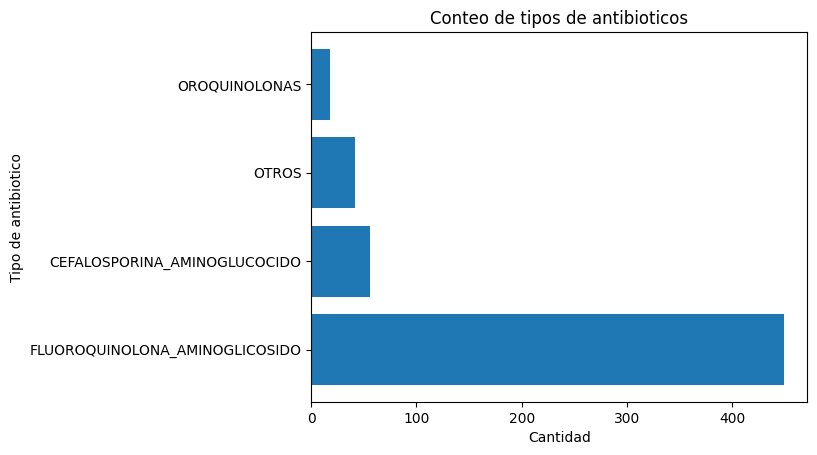

In [ ]:
# Crear el gráfico de barras
plt.barh(df2["ANTIBIOTICO"].value_counts().index, df2["ANTIBIOTICO"].value_counts().values)

plt.xlabel('Cantidad')
plt.ylabel('Tipo de antibiotico')
plt.title('Conteo de tipos de antibioticos')

plt.show()

En los siguientes gráficos dejamos fuera la columna que hace refencia a los pacientes que no se le han realizado los estudios ya que siendo tantos nos dificultaba ver los datos de las otras columnas

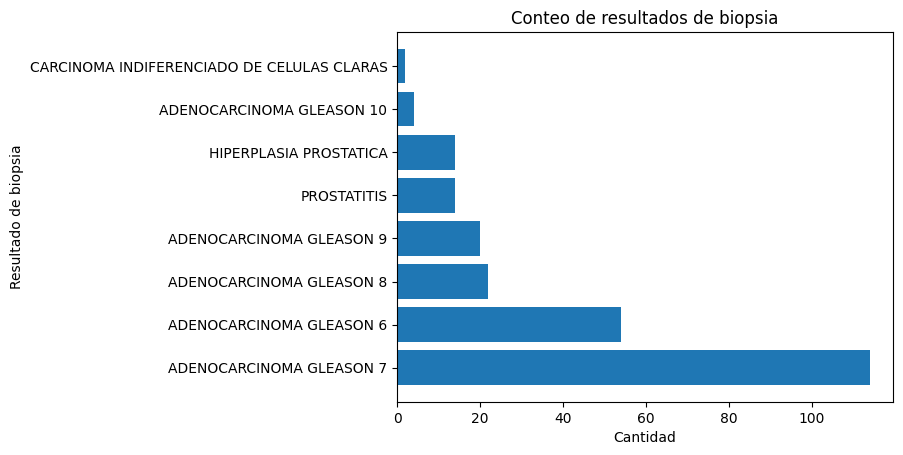

In [ ]:
df3 = df2[df2["BIOPSIA"] != "NEG"]
# Crear el gráfico de barras
plt.barh(df3["BIOPSIA"].value_counts().index, df3["BIOPSIA"].value_counts().values)

plt.xlabel('Cantidad')
plt.ylabel('Resultado de biopsia')
plt.title('Conteo de resultados de biopsia')

plt.show()

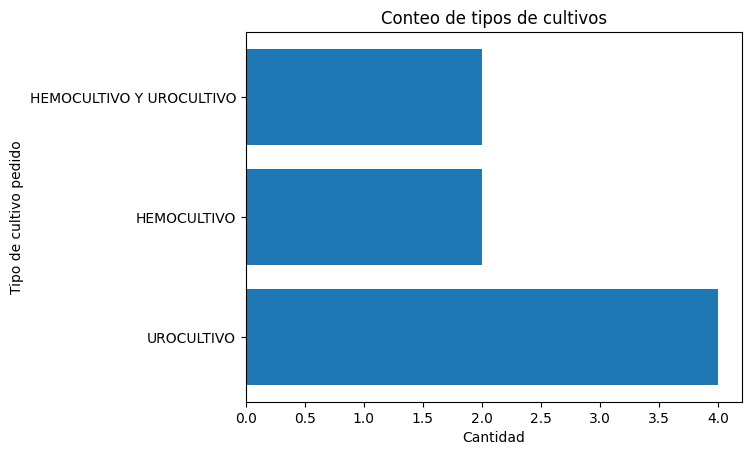

In [ ]:
df3 = df2[df2["TIPO DE CULTIVO"] != "NO"]
plt.barh(df3["TIPO DE CULTIVO"].value_counts().index, df3["TIPO DE CULTIVO"].value_counts().values)

plt.xlabel('Cantidad')
plt.ylabel('Tipo de cultivo pedido')
plt.title('Conteo de tipos de cultivos')

plt.show()

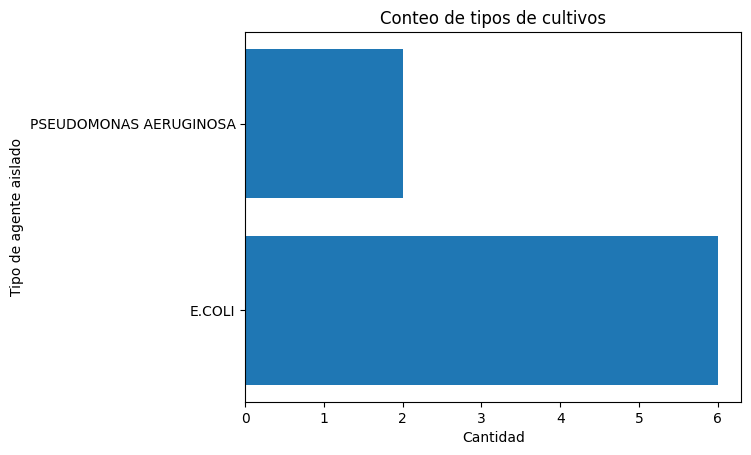

In [ ]:
df3 = df2[df2["AGENTE AISLADO"] != "NO"]
plt.barh(df3["AGENTE AISLADO"].value_counts().index, df3["AGENTE AISLADO"].value_counts().values)

plt.xlabel('Cantidad')
plt.ylabel('Tipo de agente aislado')
plt.title('Conteo de tipos de cultivos')

plt.show()

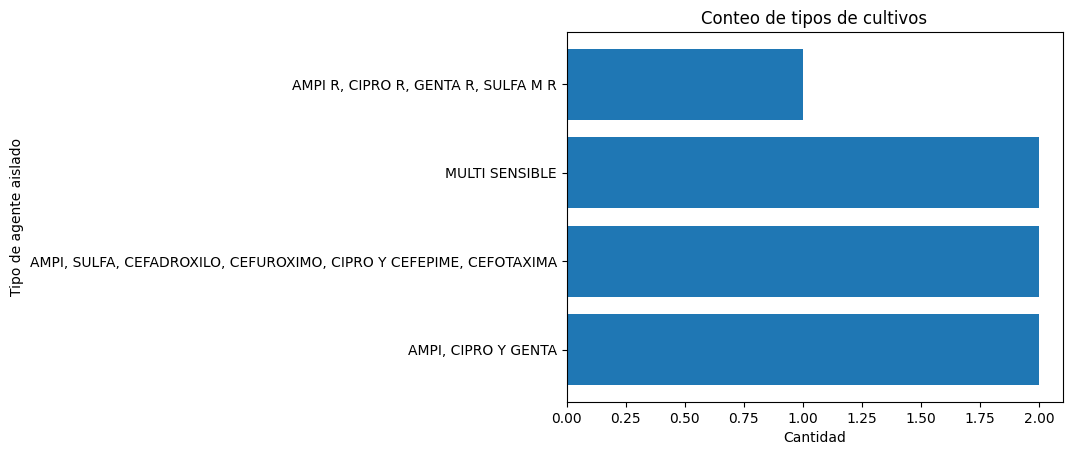

In [ ]:
df3 = df2[df2["PATRON DE RESISTENCIA"] != "NO"]
plt.barh(df3["PATRON DE RESISTENCIA"].value_counts().index, df3["PATRON DE RESISTENCIA"].value_counts().values)

plt.xlabel('Cantidad')
plt.ylabel('Tipo de agente aislado')
plt.title('Conteo de tipos de cultivos')

plt.show()

# **ESTO ES LO QUE NECESITAMOS QUE REVISE PROFE**

Ahora vamos atransformar los datos de las columnas de object a numericos

In [ ]:
for columna in df2.select_dtypes(include='object'):
 valores_unicos = df2[columna].unique()
 print(f"Valores únicos en la columna '{columna}': {valores_unicos}")

Valores únicos en la columna 'DIABETES': ['NO' 'SI']
Valores únicos en la columna 'HOSPITALIZACIÓN ULTIMO MES': ['NO' 'SI']
Valores únicos en la columna 'BIOPSIAS PREVIAS': ['NO' 'SI' nan]
Valores únicos en la columna 'VOLUMEN PROSTATICO': ['SI' 'NO' nan]
Valores únicos en la columna 'ANTIBIOTICO': ['FLUOROQUINOLONA_AMINOGLICOSIDO' 'CEFALOSPORINA_AMINOGLUCOCIDO'
 'OROQUINOLONAS' 'OTROS']
Valores únicos en la columna 'CUP': ['NO' 'SI' nan]
Valores únicos en la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA': ['NO' 'SI, EPOC' 'SI, ASMA' 'SI' nan]
Valores únicos en la columna 'BIOPSIA': ['NEG' 'ADENOCARCINOMA GLEASON 6' 'ADENOCARCINOMA GLEASON 7'
 'ADENOCARCINOMA GLEASON 10' 'ADENOCARCINOMA GLEASON 9'
 'ADENOCARCINOMA GLEASON 8' 'PROSTATITIS' 'HIPERPLASIA PROSTATICA'
 'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS']
Valores únicos en la columna 'NRO DIAS POST BIOPSIA COMPLICACION INFECCIOSA': ['1' '2' '3' '5' '9' 'NO']
Valores únicos en la columna 'FIEBRE': ['SI' 'NO']
Valores únicos en la colum

Cambiamos los valores de Si y No por 1 y 0 según corresponda

In [ ]:
diccionario = {"NO": 0, "SI": 1}
df2["DIABETES2"] = df2.DIABETES.map(diccionario)
df2["HOSPITALIZACIÓN ULTIMO MES2"] = df2["HOSPITALIZACIÓN ULTIMO MES"].map(diccionario)
df2["BIOPSIAS PREVIAS2"] = df2["BIOPSIAS PREVIAS"].map(diccionario)
df2["VOLUMEN PROSTATICO2"] = df2["VOLUMEN PROSTATICO"].map(diccionario)
df2["CUP2"] = df2["CUP"].map(diccionario)
df2["FIEBRE2"] = df2["FIEBRE"].map(diccionario)
df2["ITU2"] = df2["ITU"].map(diccionario)
df2["HOSPITALIZACION2"] = df2["HOSPITALIZACION"].map(diccionario)

In [ ]:
df2['NRO DIAS POST BIOPSIA COMPLICACION INFECCIOSA'] = df2['NRO DIAS POST BIOPSIA COMPLICACION INFECCIOSA'].replace('NO',0)


Cambiamos las variables categóricas a numéricas 

In [ ]:
df2 = pd.concat([df2, pd.get_dummies(df2["ANTIBIOTICO"])], axis =1)

In [ ]:
df2 = pd.concat([df2, pd.get_dummies(df2["ENF. CRONICA PULMONAR OBSTRUCTIVA"])], axis =1)

In [ ]:
df2 = pd.concat([df2, pd.get_dummies(df2["BIOPSIA"])], axis =1)

In [ ]:
df2 = pd.concat([df2, pd.get_dummies(df2["TIPO DE CULTIVO"])], axis =1)

In [ ]:
df2 = pd.concat([df2, pd.get_dummies(df2["AGENTE AISLADO"])], axis =1)

In [ ]:
df2 = pd.concat([df2, pd.get_dummies(df2["PATRON DE RESISTENCIA"])], axis =1)

In [ ]:
df2.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'ANTIBIOTICO',
       'NUMERO DE MUESTRAS TOMADAS', 'CUP',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NRO DIAS POST BIOPSIA COMPLICACION INFECCIOSA', 'FIEBRE', 'ITU',
       'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA',
       'HOSPITALIZACION', 'DIABETES2', 'HOSPITALIZACIÓN ULTIMO MES2',
       'BIOPSIAS PREVIAS2', 'VOLUMEN PROSTATICO2', 'CUP2', 'FIEBRE2', 'ITU2',
       'HOSPITALIZACION2', 'CEFALOSPORINA_AMINOGLUCOCIDO',
       'FLUOROQUINOLONA_AMINOGLICOSIDO', 'OROQUINOLONAS', 'OTROS', 'NO', 'SI',
       'SI, ASMA', 'SI, EPOC', 'ADENOCARCINOMA GLEASON 10',
       'ADENOCARCINOMA GLEASON 6', 'ADENOCARCINOMA GLEASON 7',
       'ADENOCARCINOMA GLEASON 8', 'ADENOCARCINOMA GLEASON 9',
       'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS', 'HIPERPLASIA PROSTATICA',
       'NEG', 'PROSTATITIS', 'HEMOCULTIVO', 'HEMOCULTIVO Y UROCULTIVO', 'NO',
  

In [ ]:
df2.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,...,NO,UROCULTIVO,E.COLI,NO,PSEUDOMONAS AERUGINOSA,"AMPI R, CIPRO R, GENTA R, SULFA M R","AMPI, CIPRO Y GENTA","AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",MULTI SENSIBLE,NO
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,1,0,0,1,0,0,0,0,0,1
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,1,0,0,1,0,0,0,0,0,1
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,0,0,1,0,0,1,0,0,0,0
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,...,1,0,0,1,0,0,0,0,0,1
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# = pd.get_dummies(df2['FIEBRE'])

Debemos aplicar el código anterior a las columnas que nos interesan. 

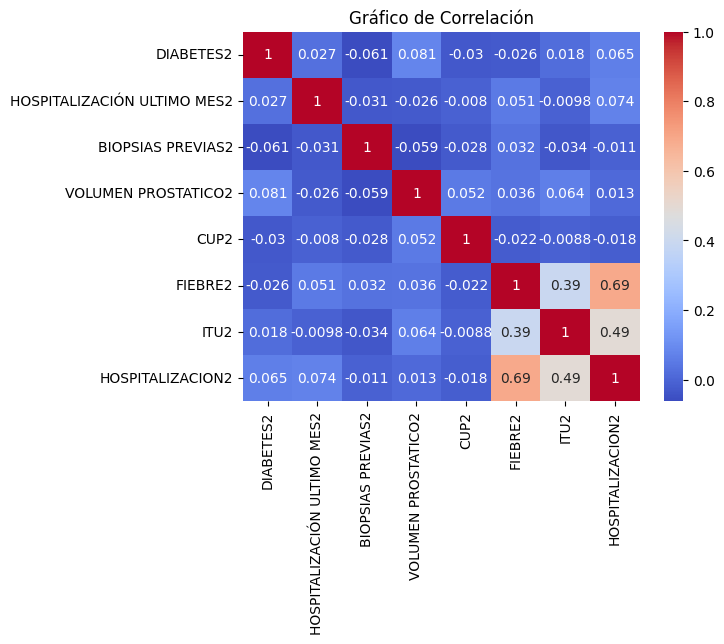

In [ ]:
# Calcular la matriz de correlación para las variables seleccionadas
correlation_matrix = df2[['DIABETES2', 'HOSPITALIZACIÓN ULTIMO MES2',
       'BIOPSIAS PREVIAS2', 'VOLUMEN PROSTATICO2', 'CUP2', 'FIEBRE2', 'ITU2',
       'HOSPITALIZACION2']].corr()

# Crear el gráfico de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.title('Gráfico de Correlación')
plt.show()

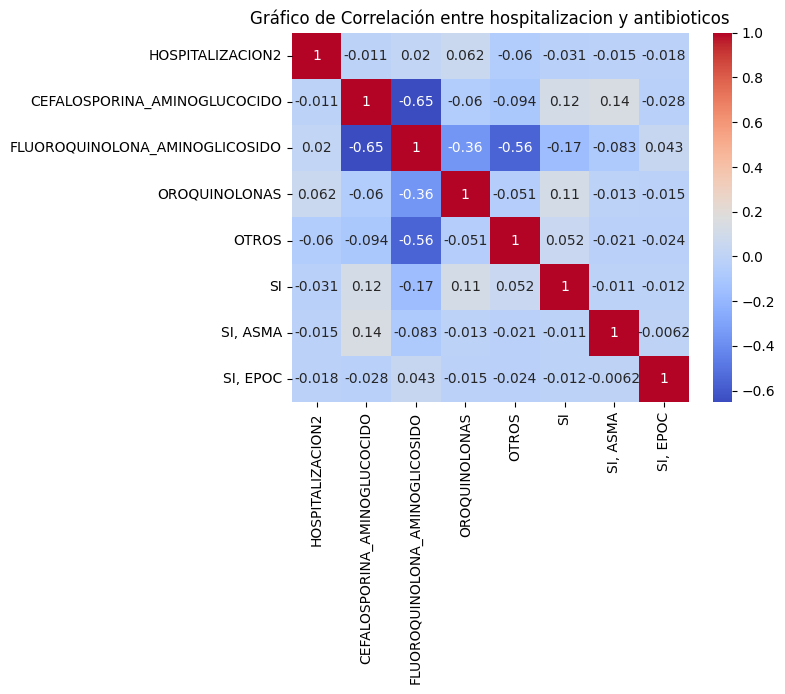

In [ ]:
# Calcular la matriz de correlación para las variables seleccionadas
correlation_matrix = df2[['HOSPITALIZACION2', 'CEFALOSPORINA_AMINOGLUCOCIDO',
       'FLUOROQUINOLONA_AMINOGLICOSIDO', 'OROQUINOLONAS', 'OTROS',  'SI',
       'SI, ASMA', 'SI, EPOC']].corr()

# Crear el gráfico de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.title('Gráfico de Correlación entre hospitalizacion y antibioticos')
plt.show()

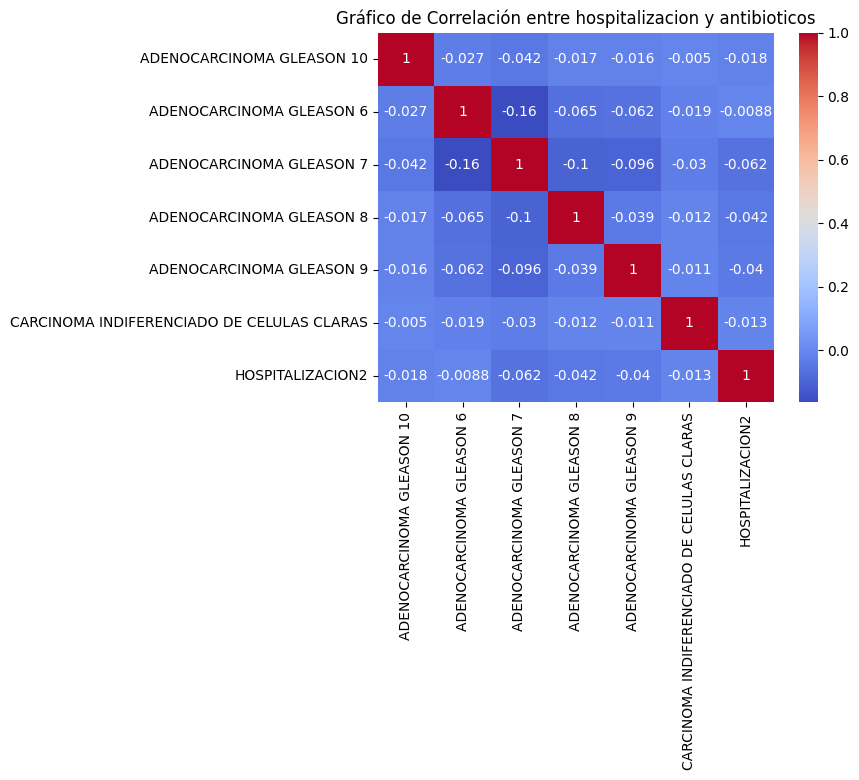

In [ ]:
# Calcular la matriz de correlación para las variables seleccionadas
correlation_matrix = df2[['ADENOCARCINOMA GLEASON 10',
       'ADENOCARCINOMA GLEASON 6', 'ADENOCARCINOMA GLEASON 7',
       'ADENOCARCINOMA GLEASON 8', 'ADENOCARCINOMA GLEASON 9',
       'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS', "HOSPITALIZACION2"]].corr()

# Crear el gráfico de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.title('Gráfico de Correlación entre hospitalizacion y antibioticos')
plt.show()

In [ ]:
df2.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'ANTIBIOTICO',
       'NUMERO DE MUESTRAS TOMADAS', 'CUP',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NRO DIAS POST BIOPSIA COMPLICACION INFECCIOSA', 'FIEBRE', 'ITU',
       'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA',
       'HOSPITALIZACION', 'DIABETES2', 'HOSPITALIZACIÓN ULTIMO MES2',
       'BIOPSIAS PREVIAS2', 'VOLUMEN PROSTATICO2', 'CUP2', 'FIEBRE2', 'ITU2',
       'HOSPITALIZACION2', 'CEFALOSPORINA_AMINOGLUCOCIDO',
       'FLUOROQUINOLONA_AMINOGLICOSIDO', 'OROQUINOLONAS', 'OTROS', 'NO', 'SI',
       'SI, ASMA', 'SI, EPOC', 'ADENOCARCINOMA GLEASON 10',
       'ADENOCARCINOMA GLEASON 6', 'ADENOCARCINOMA GLEASON 7',
       'ADENOCARCINOMA GLEASON 8', 'ADENOCARCINOMA GLEASON 9',
       'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS', 'HIPERPLASIA PROSTATICA',
       'NEG', 'PROSTATITIS', 'HEMOCULTIVO', 'HEMOCULTIVO Y UROCULTIVO', 'NO',
  

<ipython-input-254-704ffbb47abb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=df2.corr(),


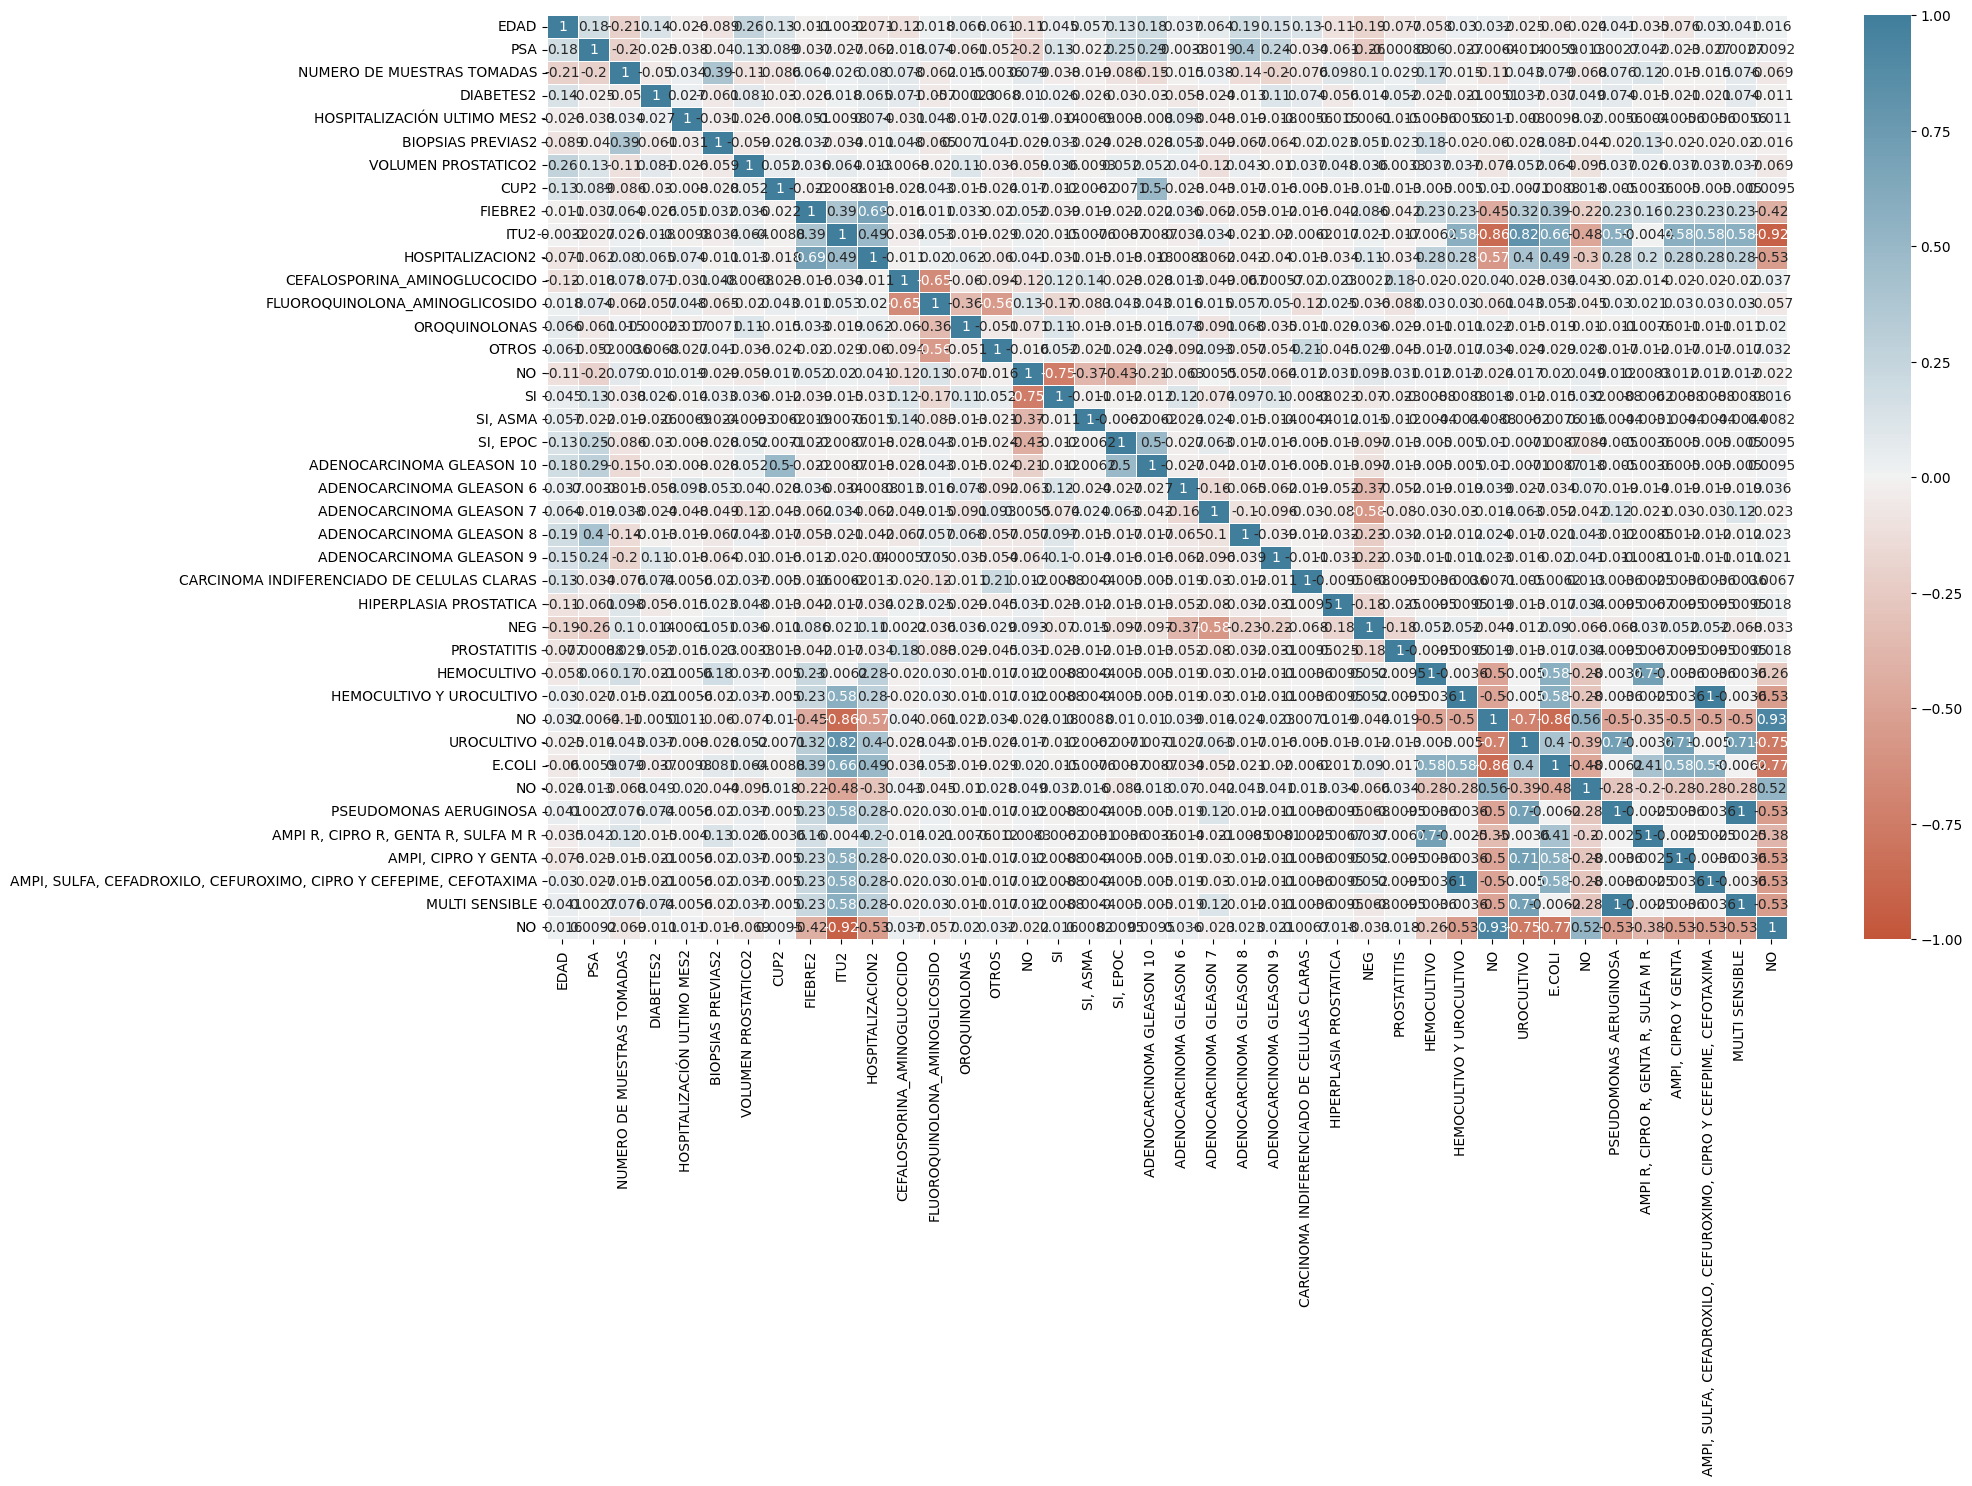

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(
 data=df2.corr(),
 cmap=sns.diverging_palette(20,230,as_cmap=True),
 center=0,
 vmin=-1,
 vmax=1,
 linewidths=0.5,
 annot=True
)
plt.show()

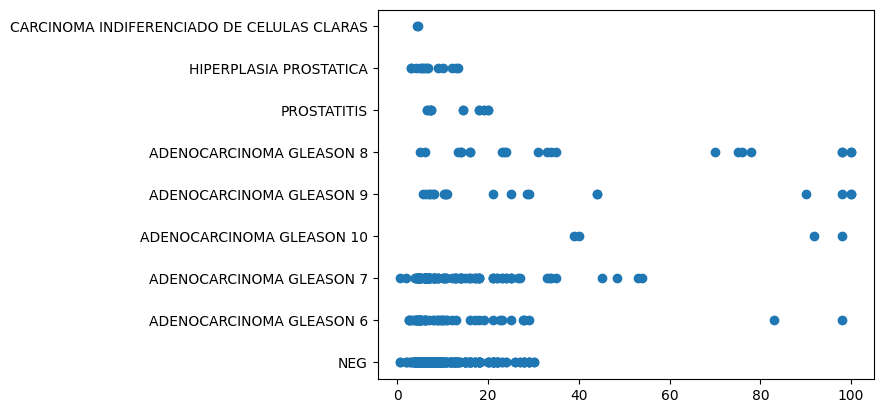

In [ ]:
plt.scatter(df2['PSA'], df2['BIOPSIA'])

In [ ]:
plt.scatter(df2['DIAS HOSPITALIZACION MQ'], df2['PSA'])

KeyError: ignored

In [ ]:
sns.barplot(y='BIOPSIA', x='EDAD', data=df)

In [ ]:
plt.scatter(df2['DIAS HOSPITALIZACION MQ'], df2['FIEBRE'])

In [ ]:
plt.scatter(df2['DIAS HOSPITALIZACION MQ'], df2['EDAD'])

In [ ]:
# Contar los valores de 'sí' y 'no'
counts = df2['HOSPITALIZACION'].value_counts()

# Crear el gráfico de barras
plt.bar(counts.index, counts.values)

# Agregar etiquetas al gráfico
plt.xlabel('Hospitalización')
plt.ylabel('Cantidad')
plt.title('Conteo de hospitalizaciones')

# Mostrar el gráfico
plt.show()

In [ ]:
counts = df2['DIAS HOSPITALIZACION MQ'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Hospitalización')
plt.ylabel('Cantidad')
plt.title('Conteo de hospitalizaciones')
plt.show()

In [ ]:
counts = df2['DIAS HOSPITALIZACIÓN UPC'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Hospitalización')
plt.ylabel('Cantidad')
plt.title('Conteo de hospitalizaciones')
plt.show()

In [ ]:
counts = df2['HOSPITALIZACIÓN ULTIMO MES'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Hospitalización')
plt.ylabel('Cantidad')
plt.title('Conteo de hospitalizaciones')
plt.show()

In [ ]:
counts = df2['DIABETES'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Hospitalización')
plt.ylabel('Cantidad')
plt.title('Conteo de hospitalizaciones')
plt.show()

In [ ]:
counts = df2['BIOPSIAS PREVIAS'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Hospitalización')
plt.ylabel('Cantidad')
plt.title('Conteo de hospitalizaciones')
plt.show()

In [ ]:
counts = df2['VOLUMEN PROSTATICO'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Hospitalización')
plt.ylabel('Cantidad')
plt.title('Conteo de hospitalizaciones')
plt.show()

Convertimos la columna fiebre a binaria